In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.tokenize import sent_tokenize
import pymysql
import pandas as pd
import numpy as np
import requests
import time
import re
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
import urllib.request
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


import seaborn as sns

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
a = pd.read_csv("./source/shampoo.csv")
b = pd.read_csv("./source/cleanser.csv")

In [65]:
clear = pd.concat([a, b], ignore_index = True)

In [66]:
clear.reset_index(drop=True)

,Unnamed: 0,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1.2K,$15.00,What it is: A nourishing and reparative hydrat...,248.1K,Good for: Damage/Community Favorite/Good for: ...,shampoo
1,1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1.1K,$30.00,What it is: A clarifying shampoo that removes ...,37.2K,Good for: Volume/All Hair Types/Good for: Flak...,shampoo
2,2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,$39.00,Which hair type is it good for?\n✔ Straight\n✔...,47K,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo
3,3,Gold Lust Collection Hair Set,Oribe,100,4,$115.00 ($139.00 value),What it is: A limited-edition set with a full-...,7.9K,Good for: Damage/Heat Protection/Good for: Fri...,shampoo
4,4,Detox Shampoo,OUAI,90,1.3K,$30.00,What it is: A clarifying shampoo that deeply c...,97K,Floral Scent/All Hair Types/Without Sulfates S...,shampoo
...,...,...,...,...,...,...,...,...,...,...
850,785,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,$28.00,What it is: A cleansing lactic acid toner with...,9.5K,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser
851,786,Gentle Foaming Face Wash,Skin Laundry,85,194,$20.00,Which skin type is it good for?\n✔ Normal\n✔ O...,7K,NaN,cleanser
852,787,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,$60.00,Which skin type is it good for?\n✔ Normal\n✔ O...,7.2K,NaN,cleanser
853,788,Mini Aglow™ Cleansing Butter,lilah b.,71,17,$7.00 $14.00,What it is: A luxurious multitasking makeup re...,4.7K,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser


In [67]:
clear.drop(columns = ["Unnamed: 0"], inplace = True)

In [68]:
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1.2K,$15.00,What it is: A nourishing and reparative hydrat...,248.1K,Good for: Damage/Community Favorite/Good for: ...,shampoo
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1.1K,$30.00,What it is: A clarifying shampoo that removes ...,37.2K,Good for: Volume/All Hair Types/Good for: Flak...,shampoo
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,$39.00,Which hair type is it good for?\n✔ Straight\n✔...,47K,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo
3,Gold Lust Collection Hair Set,Oribe,100,4,$115.00 ($139.00 value),What it is: A limited-edition set with a full-...,7.9K,Good for: Damage/Heat Protection/Good for: Fri...,shampoo
4,Detox Shampoo,OUAI,90,1.3K,$30.00,What it is: A clarifying shampoo that deeply c...,97K,Floral Scent/All Hair Types/Without Sulfates S...,shampoo
...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,$28.00,What it is: A cleansing lactic acid toner with...,9.5K,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser
851,Gentle Foaming Face Wash,Skin Laundry,85,194,$20.00,Which skin type is it good for?\n✔ Normal\n✔ O...,7K,NaN,cleanser
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,$60.00,Which skin type is it good for?\n✔ Normal\n✔ O...,7.2K,NaN,cleanser
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,$7.00 $14.00,What it is: A luxurious multitasking makeup re...,4.7K,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser


In [69]:
clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        855 non-null    object
 1   company     855 non-null    object
 2   rating      855 non-null    int64 
 3   reviewcnt   855 non-null    object
 4   price       855 non-null    object
 5   desc        855 non-null    object
 6   like        855 non-null    object
 7   highlights  655 non-null    object
 8   category    855 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [25]:
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1.2K,$15,What it is: A nourishing and reparative hydrat...,248.1K,Good for: Damage/Community Favorite/Good for: ...,shampoo
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1.1K,$30,What it is: A clarifying shampoo that removes ...,37.2K,Good for: Volume/All Hair Types/Good for: Flak...,shampoo
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,$39,Which hair type is it good for?\n✔ Straight\n✔...,47K,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo
3,Gold Lust Collection Hair Set,Oribe,100,4,$115,What it is: A limited-edition set with a full-...,7.9K,Good for: Damage/Heat Protection/Good for: Fri...,shampoo
4,Detox Shampoo,OUAI,90,1.3K,$30,What it is: A clarifying shampoo that deeply c...,97K,Floral Scent/All Hair Types/Without Sulfates S...,shampoo
...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,$28,What it is: A cleansing lactic acid toner with...,9.5K,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser
851,Gentle Foaming Face Wash,Skin Laundry,85,194,$20,Which skin type is it good for?\n✔ Normal\n✔ O...,7K,NaN,cleanser
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,$60,Which skin type is it good for?\n✔ Normal\n✔ O...,7.2K,NaN,cleanser
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,$7,What it is: A luxurious multitasking makeup re...,4.7K,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser


In [70]:
# name은 잘라낼거고 company는 라벨링 할거라서 다 합쳐서 해야함


# price 변경
clear.loc[:, "price"] = clear.loc[:, "price"].apply(lambda x : int(re.findall(r"\d+", x)[0]))

In [76]:
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1200,15,What it is: A nourishing and reparative hydrat...,248.1K,Good for: Damage/Community Favorite/Good for: ...,shampoo
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1100,30,What it is: A clarifying shampoo that removes ...,37.2K,Good for: Volume/All Hair Types/Good for: Flak...,shampoo
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,39,Which hair type is it good for?\n✔ Straight\n✔...,47K,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo
3,Gold Lust Collection Hair Set,Oribe,100,4,115,What it is: A limited-edition set with a full-...,7.9K,Good for: Damage/Heat Protection/Good for: Fri...,shampoo
4,Detox Shampoo,OUAI,90,1300,30,What it is: A clarifying shampoo that deeply c...,97K,Floral Scent/All Hair Types/Without Sulfates S...,shampoo
...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,28,What it is: A cleansing lactic acid toner with...,9.5K,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser
851,Gentle Foaming Face Wash,Skin Laundry,85,194,20,Which skin type is it good for?\n✔ Normal\n✔ O...,7K,NaN,cleanser
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,60,Which skin type is it good for?\n✔ Normal\n✔ O...,7.2K,NaN,cleanser
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,7,What it is: A luxurious multitasking makeup re...,4.7K,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser


In [81]:
clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        855 non-null    object
 1   company     855 non-null    object
 2   rating      855 non-null    int64 
 3   reviewcnt   855 non-null    int32 
 4   price       855 non-null    int64 
 5   desc        855 non-null    object
 6   like        855 non-null    object
 7   highlights  655 non-null    object
 8   category    855 non-null    object
dtypes: int32(1), int64(2), object(6)
memory usage: 56.9+ KB


In [74]:
# reviewcnt 변경
for i in clear.index :
    if clear.at[i, "reviewcnt"][-1] == "K":
        clear.at[i, "reviewcnt"] = int(float(re.sub("K", "", clear.at[i, "reviewcnt"]))*1000)
clear = clear.astype({'reviewcnt':'int'})
clear

In [79]:
clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        855 non-null    object
 1   company     855 non-null    object
 2   rating      855 non-null    int64 
 3   reviewcnt   855 non-null    int32 
 4   price       855 non-null    int64 
 5   desc        855 non-null    object
 6   like        855 non-null    object
 7   highlights  655 non-null    object
 8   category    855 non-null    object
dtypes: int32(1), int64(2), object(6)
memory usage: 56.9+ KB


In [82]:
# like 변경
for i in clear.index :
    if clear.at[i, "like"][-1] == "K":
        clear.at[i, "like"] = int(float(re.sub("K", "", clear.at[i, "like"]))*1000)
clear = clear.astype({'like':'int'})
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1200,15,What it is: A nourishing and reparative hydrat...,248100,Good for: Damage/Community Favorite/Good for: ...,shampoo
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1100,30,What it is: A clarifying shampoo that removes ...,37200,Good for: Volume/All Hair Types/Good for: Flak...,shampoo
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,39,Which hair type is it good for?\n✔ Straight\n✔...,47000,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo
3,Gold Lust Collection Hair Set,Oribe,100,4,115,What it is: A limited-edition set with a full-...,7900,Good for: Damage/Heat Protection/Good for: Fri...,shampoo
4,Detox Shampoo,OUAI,90,1300,30,What it is: A clarifying shampoo that deeply c...,97000,Floral Scent/All Hair Types/Without Sulfates S...,shampoo
...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,28,What it is: A cleansing lactic acid toner with...,9500,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser
851,Gentle Foaming Face Wash,Skin Laundry,85,194,20,Which skin type is it good for?\n✔ Normal\n✔ O...,7000,NaN,cleanser
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,60,Which skin type is it good for?\n✔ Normal\n✔ O...,7200,NaN,cleanser
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,7,What it is: A luxurious multitasking makeup re...,4700,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser


In [83]:
clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        855 non-null    object
 1   company     855 non-null    object
 2   rating      855 non-null    int64 
 3   reviewcnt   855 non-null    int32 
 4   price       855 non-null    int64 
 5   desc        855 non-null    object
 6   like        855 non-null    int32 
 7   highlights  655 non-null    object
 8   category    855 non-null    object
dtypes: int32(2), int64(2), object(5)
memory usage: 53.6+ KB


In [86]:
clear.at[0, "highlights"].split("/")

['Good for: Damage',
 'Community Favorite',
 'Good for: Color Care',
 'Fresh Scent',
 'All Hair Types',
 '']

In [91]:
# highlights 변경
clear["highlights"].fillna("N", inplace = True)

In [115]:
# 이거 보면 수정하세에에에에엠
for i in clear.index:
    if clear.at[i, "highlights"].split("/")[0] == "N":
        clear.at[i, "highlights_len"] = int(0)
        continue
    else:
        clear.at[i, "highlights_len"] = int(len(clear.at[i, "highlights"].split("/")))-1
        for j in range(len(clear.at[i, "highlights"].split("/"))-1) :
            clear.at[i, "h_"+str(j)] = clear.at[i, "highlights"].split("/")[j]


In [116]:
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,...,h_4,h_5,h_6,h_7,h_8,word_0,word_1,word_2,word_3,word_4
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1200,15,What it is: A nourishing and reparative hydrat...,248100,Good for: Damage/Community Favorite/Good for: ...,shampoo,5.0,...,All Hair Types,,N,N,N,hair,bond,nourishing,reparative,hydrating
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1100,30,What it is: A clarifying shampoo that removes ...,37200,Good for: Volume/All Hair Types/Good for: Flak...,shampoo,6.0,...,Increases Shine,Good for: Oily Scalp,,N,N,hair,clarifying,removes,shine,product
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,39,Which hair type is it good for?\n✔ Straight\n✔...,47000,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo,5.0,...,Increases Shine,,N,N,N,hair,shampoo,oil,cleansing,repair
3,Gold Lust Collection Hair Set,Oribe,100,4,115,What it is: A limited-edition set with a full-...,7900,Good for: Damage/Heat Protection/Good for: Fri...,shampoo,5.0,...,Increases Shine,,N,N,N,hair,gold,lust,oil,shampoo
4,Detox Shampoo,OUAI,90,1300,30,What it is: A clarifying shampoo that deeply c...,97000,Floral Scent/All Hair Types/Without Sulfates S...,shampoo,5.0,...,Good for: Oily Scalp,,N,N,N,hair,helps,shine,shampoo,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,28,What it is: A cleansing lactic acid toner with...,9500,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser,4.0,...,,N,N,N,N,skin,cleansing,lactic,acid,toner
851,Gentle Foaming Face Wash,Skin Laundry,85,194,20,Which skin type is it good for?\n✔ Normal\n✔ O...,7000,N,cleanser,0.0,...,N,N,N,N,N,skin,gentle,perfect,sensitive,foaming
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,60,Which skin type is it good for?\n✔ Normal\n✔ O...,7200,N,cleanser,0.0,...,N,N,N,N,N,skin,dry,cream-to-oil,cleanser,mask
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,7,What it is: A luxurious multitasking makeup re...,4700,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser,3.0,...,N,N,N,N,N,ingredients,oil,skin,butter,hydrated


In [102]:
clear["h_0"].fillna("N", inplace = True)
clear["h_1"].fillna("N", inplace = True)
clear["h_2"].fillna("N", inplace = True)
clear["h_3"].fillna("N", inplace = True)
clear["h_4"].fillna("N", inplace = True)
clear["h_5"].fillna("N", inplace = True)
clear["h_6"].fillna("N", inplace = True)
clear["h_7"].fillna("N", inplace = True)
clear["h_8"].fillna("N", inplace = True)

In [103]:
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1200,15,What it is: A nourishing and reparative hydrat...,248100,Good for: Damage/Community Favorite/Good for: ...,shampoo,6.0,Good for: Damage,Community Favorite,Good for: Color Care,Fresh Scent,All Hair Types,,N,N,N
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1100,30,What it is: A clarifying shampoo that removes ...,37200,Good for: Volume/All Hair Types/Good for: Flak...,shampoo,7.0,Good for: Volume,All Hair Types,Good for: Flaky,Dry Scalp,Increases Shine,Good for: Oily Scalp,,N,N
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,39,Which hair type is it good for?\n✔ Straight\n✔...,47000,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo,6.0,Good for: Damage,All Hair Types,Good for: Dryness,Gluten Free,Increases Shine,,N,N,N
3,Gold Lust Collection Hair Set,Oribe,100,4,115,What it is: A limited-edition set with a full-...,7900,Good for: Damage/Heat Protection/Good for: Fri...,shampoo,6.0,Good for: Damage,Heat Protection,Good for: Frizz,UV Protection,Increases Shine,,N,N,N
4,Detox Shampoo,OUAI,90,1300,30,What it is: A clarifying shampoo that deeply c...,97000,Floral Scent/All Hair Types/Without Sulfates S...,shampoo,6.0,Floral Scent,All Hair Types,Without Sulfates SLS & SLES,Increases Shine,Good for: Oily Scalp,,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,28,What it is: A cleansing lactic acid toner with...,9500,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser,5.0,Good for: Dullness,Uneven Texture,Good for: Acne,Blemishes,,N,N,N,N
851,Gentle Foaming Face Wash,Skin Laundry,85,194,20,Which skin type is it good for?\n✔ Normal\n✔ O...,7000,N,cleanser,0.0,N,N,N,N,N,N,N,N,N
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,60,Which skin type is it good for?\n✔ Normal\n✔ O...,7200,N,cleanser,0.0,N,N,N,N,N,N,N,N,N
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,7,What it is: A luxurious multitasking makeup re...,4700,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser,4.0,Hydrating,"Best for Dry, Combo, Normal Skin",Gluten Free,,N,N,N,N,N


In [ ]:
# desc tokenizer
# ?? 개 정도 붙인 후 desc는 drop해버릴 것
# drop 할 것들 : name, desc

In [111]:

for k in clear.index:
    text = clear.at[k, "desc"]
    tokenized_text = sent_tokenize(text)
    vocab = Counter() # 빈도수 계산
    sentences = []
    stop_words = set(stopwords.words('english'))
    for i in tokenized_text:
        sentence = word_tokenize(i) # 토크나이징
        result = []

        for word in sentence:
            word = word.lower() # 의미 없으니 소문자화
            if word not in stop_words: # 불용어 제거
                if len(word) > 2: 
                    result.append(word) 
                    vocab[word] = vocab[word]+1
        sentences.append(result)
        vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse=True)
        cut_count = 0
        for j in range(0, len(vocab_sorted)) :
            if cut_count == 5:
                break
            else:
                clear.at[k, "word_"+str(j)] = vocab_sorted[j][0]
                cut_count += 1

In [112]:
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,...,h_4,h_5,h_6,h_7,h_8,word_0,word_1,word_2,word_3,word_4
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1200,15,What it is: A nourishing and reparative hydrat...,248100,Good for: Damage/Community Favorite/Good for: ...,shampoo,6.0,...,All Hair Types,,N,N,N,hair,bond,nourishing,reparative,hydrating
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1100,30,What it is: A clarifying shampoo that removes ...,37200,Good for: Volume/All Hair Types/Good for: Flak...,shampoo,7.0,...,Increases Shine,Good for: Oily Scalp,,N,N,hair,clarifying,removes,shine,product
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,39,Which hair type is it good for?\n✔ Straight\n✔...,47000,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo,6.0,...,Increases Shine,,N,N,N,hair,shampoo,oil,cleansing,repair
3,Gold Lust Collection Hair Set,Oribe,100,4,115,What it is: A limited-edition set with a full-...,7900,Good for: Damage/Heat Protection/Good for: Fri...,shampoo,6.0,...,Increases Shine,,N,N,N,hair,gold,lust,oil,shampoo
4,Detox Shampoo,OUAI,90,1300,30,What it is: A clarifying shampoo that deeply c...,97000,Floral Scent/All Hair Types/Without Sulfates S...,shampoo,6.0,...,Good for: Oily Scalp,,N,N,N,hair,helps,shine,shampoo,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,28,What it is: A cleansing lactic acid toner with...,9500,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser,5.0,...,,N,N,N,N,skin,cleansing,lactic,acid,toner
851,Gentle Foaming Face Wash,Skin Laundry,85,194,20,Which skin type is it good for?\n✔ Normal\n✔ O...,7000,N,cleanser,0.0,...,N,N,N,N,N,skin,gentle,perfect,sensitive,foaming
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,60,Which skin type is it good for?\n✔ Normal\n✔ O...,7200,N,cleanser,0.0,...,N,N,N,N,N,skin,dry,cream-to-oil,cleanser,mask
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,7,What it is: A luxurious multitasking makeup re...,4700,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser,4.0,...,N,N,N,N,N,ingredients,oil,skin,butter,hydrated


In [118]:
clear[clear["h_8"] != "N"]

,name,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,...,h_4,h_5,h_6,h_7,h_8,word_0,word_1,word_2,word_3,word_4
535,Gentle Brightening Gel Cleanser with Mandelic ...,Hyper Skin,94,96,28,What it is: A cleanser to visibly unclog pores...,4000,Good for: Dullness/Uneven Texture/Good for: Po...,cleanser,8.0,...,Good for: Acne,Blemishes,"Best for Dry, Combo, Normal Skin",Good for: Dark spots,,skin,ingredients,visibly,mandelic,acid


In [129]:
for i in clear.index:
    for j in range(0, 9):
        if clear.at[i, "h_"+str(j)] == "":
            clear.at[i, "h_"+str(j)] = "N"

In [130]:
clear

,name,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,...,h_4,h_5,h_6,h_7,h_8,word_0,word_1,word_2,word_3,word_4
0,No. 5 Bond Maintenance™ Conditioner,Olaplex,81,1200,15,What it is: A nourishing and reparative hydrat...,248100,Good for: Damage/Community Favorite/Good for: ...,shampoo,5.0,...,All Hair Types,N,N,N,N,hair,bond,nourishing,reparative,hydrating
1,No. 4C Bond Maintenance™ Clarifying Shampoo,Olaplex,96,1100,30,What it is: A clarifying shampoo that removes ...,37200,Good for: Volume/All Hair Types/Good for: Flak...,shampoo,6.0,...,Increases Shine,Good for: Oily Scalp,N,N,N,hair,clarifying,removes,shine,product
2,"Don’t Despair, Repair!™ Super Moisture Shampoo...",Briogeo,81,785,39,Which hair type is it good for?\n✔ Straight\n✔...,47000,Good for: Damage/All Hair Types/Good for: Dryn...,shampoo,5.0,...,Increases Shine,N,N,N,N,hair,shampoo,oil,cleansing,repair
3,Gold Lust Collection Hair Set,Oribe,100,4,115,What it is: A limited-edition set with a full-...,7900,Good for: Damage/Heat Protection/Good for: Fri...,shampoo,5.0,...,Increases Shine,N,N,N,N,hair,gold,lust,oil,shampoo
4,Detox Shampoo,OUAI,90,1300,30,What it is: A clarifying shampoo that deeply c...,97000,Floral Scent/All Hair Types/Without Sulfates S...,shampoo,5.0,...,Good for: Oily Scalp,N,N,N,N,hair,helps,shine,shampoo,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,90,199,28,What it is: A cleansing lactic acid toner with...,9500,Good for: Dullness/Uneven Texture/Good for: Ac...,cleanser,4.0,...,N,N,N,N,N,skin,cleansing,lactic,acid,toner
851,Gentle Foaming Face Wash,Skin Laundry,85,194,20,Which skin type is it good for?\n✔ Normal\n✔ O...,7000,N,cleanser,0.0,...,N,N,N,N,N,skin,gentle,perfect,sensitive,foaming
852,Multi-Miracle Glow Cleansing Balm,Charlotte Tilbury,82,35,60,Which skin type is it good for?\n✔ Normal\n✔ O...,7200,N,cleanser,0.0,...,N,N,N,N,N,skin,dry,cream-to-oil,cleanser,mask
853,Mini Aglow™ Cleansing Butter,lilah b.,71,17,7,What it is: A luxurious multitasking makeup re...,4700,"Hydrating/Best for Dry, Combo, Normal Skin/Glu...",cleanser,3.0,...,N,N,N,N,N,ingredients,oil,skin,butter,hydrated


In [131]:
clear.to_csv("./source/pre_first.csv")

zcxv


In [49]:
df = pd.read_csv("./source/style.csv")
df

,Unnamed: 0,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,0,Silicone Scalp Massager,SEPHORA COLLECTION,96,330,$12.00,What it is: An eco-friendly silicone scalp mas...,54.7K,NaN,styling_href
1,1,Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2.9K,$75.00,What it is: A leave-in treatment mask for all ...,67.2K,Good for: Damage/All Hair Types/Without Silico...,styling_href
2,2,Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1.3K,$25.00,What it is: A lightweight leave-in conditioner...,94.4K,All Hair Types/Good for: Frizz/Good for: Dryne...,styling_href
3,3,No. 3 Hair Repair Perfector,Olaplex,87,3.9K,$30.00,What it is: A pre-shampoo hair treatment that ...,519.1K,Good for: Damage/Community Favorite/Good for: ...,styling_href
4,4,Moroccanoil Treatment Hair Oil,Moroccanoil,92,1.8K,$34.00,"What it is: A multitasking, argan oil-infused ...",190.1K,NaN,styling_href
...,...,...,...,...,...,...,...,...,...,...
858,858,1-800-Hold-Me No-Crunch Flexible Hold Hairspray,IGK,76,22,$29.00,What it is: A flexible hairspray that delivers...,2.9K,Medium Hold/Heat Protection/Increases Shine/,styling_href
859,859,Hairdresser's Invisible Oil Hot Oil Concentrat...,Bumble and bumble,62,7,$8.00,What it is: A heated oil packed with the 6-Oil...,2.4K,NaN,styling_href
860,860,Sumo Liquid Wax+ Finishing Spray,Bumble and bumble,78,12,$32.00,What it is: A texturizing spray wax for piecey...,2.1K,NaN,styling_href
861,861,Strength Cure Split-End Salve Leave-In Treatment,Pureology,88,56,$29.50,What it is: A leave-in treatment that strength...,4.5K,Good for: Damage/Good for: Color Care/Without ...,styling_href


In [50]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df

,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,Silicone Scalp Massager,SEPHORA COLLECTION,96,330,$12.00,What it is: An eco-friendly silicone scalp mas...,54.7K,NaN,styling_href
1,Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2.9K,$75.00,What it is: A leave-in treatment mask for all ...,67.2K,Good for: Damage/All Hair Types/Without Silico...,styling_href
2,Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1.3K,$25.00,What it is: A lightweight leave-in conditioner...,94.4K,All Hair Types/Good for: Frizz/Good for: Dryne...,styling_href
3,No. 3 Hair Repair Perfector,Olaplex,87,3.9K,$30.00,What it is: A pre-shampoo hair treatment that ...,519.1K,Good for: Damage/Community Favorite/Good for: ...,styling_href
4,Moroccanoil Treatment Hair Oil,Moroccanoil,92,1.8K,$34.00,"What it is: A multitasking, argan oil-infused ...",190.1K,NaN,styling_href
...,...,...,...,...,...,...,...,...,...
858,1-800-Hold-Me No-Crunch Flexible Hold Hairspray,IGK,76,22,$29.00,What it is: A flexible hairspray that delivers...,2.9K,Medium Hold/Heat Protection/Increases Shine/,styling_href
859,Hairdresser's Invisible Oil Hot Oil Concentrat...,Bumble and bumble,62,7,$8.00,What it is: A heated oil packed with the 6-Oil...,2.4K,NaN,styling_href
860,Sumo Liquid Wax+ Finishing Spray,Bumble and bumble,78,12,$32.00,What it is: A texturizing spray wax for piecey...,2.1K,NaN,styling_href
861,Strength Cure Split-End Salve Leave-In Treatment,Pureology,88,56,$29.50,What it is: A leave-in treatment that strength...,4.5K,Good for: Damage/Good for: Color Care/Without ...,styling_href


In [51]:
df["category"] ="hair_styling_treatment"

In [52]:
df

,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,Silicone Scalp Massager,SEPHORA COLLECTION,96,330,$12.00,What it is: An eco-friendly silicone scalp mas...,54.7K,NaN,hair_styling_treatment
1,Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2.9K,$75.00,What it is: A leave-in treatment mask for all ...,67.2K,Good for: Damage/All Hair Types/Without Silico...,hair_styling_treatment
2,Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1.3K,$25.00,What it is: A lightweight leave-in conditioner...,94.4K,All Hair Types/Good for: Frizz/Good for: Dryne...,hair_styling_treatment
3,No. 3 Hair Repair Perfector,Olaplex,87,3.9K,$30.00,What it is: A pre-shampoo hair treatment that ...,519.1K,Good for: Damage/Community Favorite/Good for: ...,hair_styling_treatment
4,Moroccanoil Treatment Hair Oil,Moroccanoil,92,1.8K,$34.00,"What it is: A multitasking, argan oil-infused ...",190.1K,NaN,hair_styling_treatment
...,...,...,...,...,...,...,...,...,...
858,1-800-Hold-Me No-Crunch Flexible Hold Hairspray,IGK,76,22,$29.00,What it is: A flexible hairspray that delivers...,2.9K,Medium Hold/Heat Protection/Increases Shine/,hair_styling_treatment
859,Hairdresser's Invisible Oil Hot Oil Concentrat...,Bumble and bumble,62,7,$8.00,What it is: A heated oil packed with the 6-Oil...,2.4K,NaN,hair_styling_treatment
860,Sumo Liquid Wax+ Finishing Spray,Bumble and bumble,78,12,$32.00,What it is: A texturizing spray wax for piecey...,2.1K,NaN,hair_styling_treatment
861,Strength Cure Split-End Salve Leave-In Treatment,Pureology,88,56,$29.50,What it is: A leave-in treatment that strength...,4.5K,Good for: Damage/Good for: Color Care/Without ...,hair_styling_treatment


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        863 non-null    object
 1   company     863 non-null    object
 2   rating      863 non-null    int64 
 3   reviewcnt   863 non-null    object
 4   price       863 non-null    object
 5   desc        863 non-null    object
 6   like        863 non-null    object
 7   highlights  668 non-null    object
 8   category    863 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.8+ KB


In [54]:
len(df["name"].unique())

848

In [55]:
df["name"].value_counts()

Superfoods™ Avocado + Kiwi Moisture Leave-In Conditioner    2
Volume Spray                                                2
Perfect hair Day (PhD) Advanced Clean Dry Shampoo           2
Style Lab Flex Hairspray                                    2
Curl Mousse                                                 2
                                                           ..
Wild Marula™ Tangle Spray                                   1
Light Defining Curl Cream                                   1
Oily Scalp Treatment                                        1
Intense Curl Cream                                          1
Style + Protect Volumizing Texture Finishing Hairspray      1
Name: name, Length: 848, dtype: int64

In [56]:
df[df["name"] == "Perfect hair Day (PhD) Advanced Clean Dry Shampoo"]

,name,company,rating,reviewcnt,price,desc,like,highlights,category
20,Perfect hair Day (PhD) Advanced Clean Dry Shampoo,Living Proof,87,501,$33.00,What it is: An advanced dry shampoo that remov...,18.3K,All Hair Types/Good for: Dryness/Without Silic...,hair_styling_treatment
78,Perfect hair Day (PhD) Advanced Clean Dry Shampoo,Living Proof,87,501,$33.00,What it is: An advanced dry shampoo that remov...,18.3K,All Hair Types/Good for: Dryness/Without Silic...,hair_styling_treatment


In [57]:
df.drop_duplicates(['name'], keep = 'first', inplace = True)

In [58]:
df

,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,Silicone Scalp Massager,SEPHORA COLLECTION,96,330,$12.00,What it is: An eco-friendly silicone scalp mas...,54.7K,NaN,hair_styling_treatment
1,Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2.9K,$75.00,What it is: A leave-in treatment mask for all ...,67.2K,Good for: Damage/All Hair Types/Without Silico...,hair_styling_treatment
2,Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1.3K,$25.00,What it is: A lightweight leave-in conditioner...,94.4K,All Hair Types/Good for: Frizz/Good for: Dryne...,hair_styling_treatment
3,No. 3 Hair Repair Perfector,Olaplex,87,3.9K,$30.00,What it is: A pre-shampoo hair treatment that ...,519.1K,Good for: Damage/Community Favorite/Good for: ...,hair_styling_treatment
4,Moroccanoil Treatment Hair Oil,Moroccanoil,92,1.8K,$34.00,"What it is: A multitasking, argan oil-infused ...",190.1K,NaN,hair_styling_treatment
...,...,...,...,...,...,...,...,...,...
858,1-800-Hold-Me No-Crunch Flexible Hold Hairspray,IGK,76,22,$29.00,What it is: A flexible hairspray that delivers...,2.9K,Medium Hold/Heat Protection/Increases Shine/,hair_styling_treatment
859,Hairdresser's Invisible Oil Hot Oil Concentrat...,Bumble and bumble,62,7,$8.00,What it is: A heated oil packed with the 6-Oil...,2.4K,NaN,hair_styling_treatment
860,Sumo Liquid Wax+ Finishing Spray,Bumble and bumble,78,12,$32.00,What it is: A texturizing spray wax for piecey...,2.1K,NaN,hair_styling_treatment
861,Strength Cure Split-End Salve Leave-In Treatment,Pureology,88,56,$29.50,What it is: A leave-in treatment that strength...,4.5K,Good for: Damage/Good for: Color Care/Without ...,hair_styling_treatment


In [59]:
len(df["name"].unique())

848

In [60]:
df.set_index("name", inplace = True)

In [45]:
df

,company,rating,reviewcnt,price,desc,like,highlights,category
name,,,,,,,,
Silicone Scalp Massager,SEPHORA COLLECTION,96,330,$12.00,What it is: An eco-friendly silicone scalp mas...,54.7K,NaN,hair_styling_treatment
Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2.9K,$75.00,What it is: A leave-in treatment mask for all ...,67.2K,Good for: Damage/All Hair Types/Without Silico...,hair_styling_treatment
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1.3K,$25.00,What it is: A lightweight leave-in conditioner...,94.4K,All Hair Types/Good for: Frizz/Good for: Dryne...,hair_styling_treatment
No. 3 Hair Repair Perfector,Olaplex,87,3.9K,$30.00,What it is: A pre-shampoo hair treatment that ...,519.1K,Good for: Damage/Community Favorite/Good for: ...,hair_styling_treatment
Moroccanoil Treatment Hair Oil,Moroccanoil,92,1.8K,$34.00,"What it is: A multitasking, argan oil-infused ...",190.1K,NaN,hair_styling_treatment
...,...,...,...,...,...,...,...,...
1-800-Hold-Me No-Crunch Flexible Hold Hairspray,IGK,76,22,$29.00,What it is: A flexible hairspray that delivers...,2.9K,Medium Hold/Heat Protection/Increases Shine/,hair_styling_treatment
Hairdresser's Invisible Oil Hot Oil Concentrate - Single Dose,Bumble and bumble,62,7,$8.00,What it is: A heated oil packed with the 6-Oil...,2.4K,NaN,hair_styling_treatment
Sumo Liquid Wax+ Finishing Spray,Bumble and bumble,78,12,$32.00,What it is: A texturizing spray wax for piecey...,2.1K,NaN,hair_styling_treatment


In [46]:
def change_feature(df):
  # price 바꾸기
  # $ 지우고 형식 다른 것들 전부 앞자리 달러만 가져오기
    df.loc[:, "price"] = df.loc[:, "price"].apply(lambda x : int(re.findall(r"\d+", x)[0]))

    # reviewcnt, like 변경
    # 00.0K 로 되어있는 수 K 지우고 형변환
    for i in df.index :
        if df.at[i, "reviewcnt"][-1] == "K":
            df.at[i, "reviewcnt"] = int(float(re.sub("K", "", df.at[i, "reviewcnt"]))*1000)
    df = df.astype({'reviewcnt':'int'})

    for i in df.index :
        if df.at[i, "like"][-1] == "K":
            df.at[i, "like"] = int(float(re.sub("K", "", df.at[i, "like"]))*1000)
    df = df.astype({'like':'int'})

    # highlights 변경
    # 슬래시 단위로 잘라내어 토큰화
    # highlights의 숫자 자체도 이미가 있을 것 같아서 길이도 넣어주고
    # 각 하이라이트별로 뒤에 컬럼으로 추가해줌. 만약 빈 것들에 대해선 N으로 처리
    df["highlights"].fillna("N", inplace = True)
    for i in df.index:
        if df.at[i, "highlights"].split("/")[0] == "N":
            df.at[i, "highlights_len"] = int(0)
            continue
        else:
            df.at[i, "highlights_len"] = int(len(df.at[i, "highlights"].split("/")))-1
            for j in range(len(df.at[i, "highlights"].split("/"))-1) :
                df.at[i, "h_"+str(j)] = df.at[i, "highlights"].split("/")[j]

    # desc 변경
    # ??? 개 정도 뒤로 붙이고 긴 desc는 drop해버리기
    # 음.. 근데 어칼지 고민해봐야지...
    for k in df.index:
        text = df.at[k, "desc"]
        tokenized_text = sent_tokenize(text)
        vocab = Counter() # 빈도수 계산
        sentences = []
        stop_words = set(stopwords.words('english'))
        for i in tokenized_text:
            sentence = word_tokenize(i) # 토크나이징
            result = []

            for word in sentence:
                word = word.lower() # 의미 없으니 소문자화
                if word not in stop_words: # 불용어 제거
                    if len(word) > 2: 
                        result.append(word) 
                        vocab[word] = vocab[word]+1
            sentences.append(result)
            vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse=True)
            cut_count = 0
            for j in range(0, len(vocab_sorted)) :
                if cut_count == 5:
                    break
                else:
                    df.at[k, "word_"+str(j)] = vocab_sorted[j][0]
                    cut_count += 1
                    
                    
    return df

In [62]:
a = change_feature(df)

In [63]:
a

,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,h_0,...,h_3,h_4,h_5,h_6,h_7,word_0,word_1,word_2,word_3,word_4
name,,,,,,,,,,,,,,,,,,,,,
Silicone Scalp Massager,SEPHORA COLLECTION,96,330,12,What it is: An eco-friendly silicone scalp mas...,54700,N,hair_styling_treatment,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,scalp,massager,eco-friendly,silicone,hygienic
Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2900,75,What it is: A leave-in treatment mask for all ...,67200,Good for: Damage/All Hair Types/Without Silico...,hair_styling_treatment,4.0,Good for: Damage,...,Good for: Color Care,NaN,NaN,NaN,NaN,hair,damage,color,strength,ingredients
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1300,25,What it is: A lightweight leave-in conditioner...,94400,All Hair Types/Good for: Frizz/Good for: Dryne...,hair_styling_treatment,5.0,All Hair Types,...,Gluten Free,Increases Shine,NaN,NaN,NaN,hair,frizz,formulated,ingredients,leave-in
No. 3 Hair Repair Perfector,Olaplex,87,3900,30,What it is: A pre-shampoo hair treatment that ...,519100,Good for: Damage/Community Favorite/Good for: ...,hair_styling_treatment,5.0,Good for: Damage,...,Good for: Volume,All Hair Types,NaN,NaN,NaN,hair,pre-shampoo,treatment,reduces,breakage
Moroccanoil Treatment Hair Oil,Moroccanoil,92,1800,34,"What it is: A multitasking, argan oil-infused ...",190100,N,hair_styling_treatment,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,multitasking,argan,oil-infused,hair,treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-800-Hold-Me No-Crunch Flexible Hold Hairspray,IGK,76,22,29,What it is: A flexible hairspray that delivers...,2900,Medium Hold/Heat Protection/Increases Shine/,hair_styling_treatment,3.0,Medium Hold,...,NaN,NaN,NaN,NaN,NaN,hair,touchable,heat,hairspray,delivers
Hairdresser's Invisible Oil Hot Oil Concentrate - Single Dose,Bumble and bumble,62,7,8,What it is: A heated oil packed with the 6-Oil...,2400,N,hair_styling_treatment,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,oil,hair,6-oil,blend,castor
Sumo Liquid Wax+ Finishing Spray,Bumble and bumble,78,12,32,What it is: A texturizing spray wax for piecey...,2100,N,hair_styling_treatment,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,hair,spray,texture,light,hold


In [71]:
features = ["company", "category"]
for f in features:
    le = LabelEncoder()
    le.fit(a.loc[:, f])
    a.loc[:, f] = le.transform(a.loc[:, f])

In [72]:
a

,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,h_0,...,h_3,h_4,h_5,h_6,h_7,word_0,word_1,word_2,word_3,word_4
name,,,,,,,,,,,,,,,,,,,,,
Silicone Scalp Massager,45,96,330,12,What it is: An eco-friendly silicone scalp mas...,54700,N,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,scalp,massager,eco-friendly,silicone,hygienic
Leave-In Molecular Repair Hair Mask,26,86,2900,75,What it is: A leave-in treatment mask for all ...,67200,Good for: Damage/All Hair Types/Without Silico...,0,4.0,Good for: Damage,...,Good for: Color Care,NaN,NaN,NaN,NaN,hair,damage,color,strength,ingredients
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,5,83,1300,25,What it is: A lightweight leave-in conditioner...,94400,All Hair Types/Good for: Frizz/Good for: Dryne...,0,5.0,All Hair Types,...,Gluten Free,Increases Shine,NaN,NaN,NaN,hair,frizz,formulated,ingredients,leave-in
No. 3 Hair Repair Perfector,37,87,3900,30,What it is: A pre-shampoo hair treatment that ...,519100,Good for: Damage/Community Favorite/Good for: ...,0,5.0,Good for: Damage,...,Good for: Volume,All Hair Types,NaN,NaN,NaN,hair,pre-shampoo,treatment,reduces,breakage
Moroccanoil Treatment Hair Oil,34,92,1800,34,"What it is: A multitasking, argan oil-infused ...",190100,N,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,multitasking,argan,oil-infused,hair,treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-800-Hold-Me No-Crunch Flexible Hold Hairspray,22,76,22,29,What it is: A flexible hairspray that delivers...,2900,Medium Hold/Heat Protection/Increases Shine/,0,3.0,Medium Hold,...,NaN,NaN,NaN,NaN,NaN,hair,touchable,heat,hairspray,delivers
Hairdresser's Invisible Oil Hot Oil Concentrate - Single Dose,6,62,7,8,What it is: A heated oil packed with the 6-Oil...,2400,N,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,oil,hair,6-oil,blend,castor
Sumo Liquid Wax+ Finishing Spray,6,78,12,32,What it is: A texturizing spray wax for piecey...,2100,N,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,hair,spray,texture,light,hold


In [76]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, Silicone Scalp Massager to Style + Protect Volumizing Texture Finishing Hairspray
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         848 non-null    int32  
 1   rating          848 non-null    int64  
 2   reviewcnt       848 non-null    int32  
 3   price           848 non-null    int64  
 4   like            848 non-null    int32  
 5   category        848 non-null    int32  
 6   highlights_len  848 non-null    float64
 7   h_0             658 non-null    object 
 8   h_1             654 non-null    object 
 9   h_2             641 non-null    object 
 10  h_3             585 non-null    object 
 11  h_4             454 non-null    object 
 12  h_5             205 non-null    object 
 13  h_6             14 non-null     object 
 14  h_7             1 non-null      object 
 15  word_0          848 non-null    object 
 16  word_1      

In [75]:
a.drop(columns = ["desc", "highlights"], inplace = True)

In [82]:
a

,company,rating,reviewcnt,price,like,category,highlights_len,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,word_0,word_1,word_2,word_3,word_4
name,,,,,,,,,,,,,,,,,,,,
Silicone Scalp Massager,45,96,330,12,54700,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scalp,massager,eco-friendly,silicone,hygienic
Leave-In Molecular Repair Hair Mask,26,86,2900,75,67200,0,4.0,Good for: Damage,All Hair Types,Without Silicones,Good for: Color Care,NaN,NaN,NaN,NaN,hair,damage,color,strength,ingredients
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,5,83,1300,25,94400,0,5.0,All Hair Types,Good for: Frizz,Good for: Dryness,Gluten Free,Increases Shine,NaN,NaN,NaN,hair,frizz,formulated,ingredients,leave-in
No. 3 Hair Repair Perfector,37,87,3900,30,519100,0,5.0,Good for: Damage,Community Favorite,Good for: Color Care,Good for: Volume,All Hair Types,NaN,NaN,NaN,hair,pre-shampoo,treatment,reduces,breakage
Moroccanoil Treatment Hair Oil,34,92,1800,34,190100,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multitasking,argan,oil-infused,hair,treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-800-Hold-Me No-Crunch Flexible Hold Hairspray,22,76,22,29,2900,0,3.0,Medium Hold,Heat Protection,Increases Shine,NaN,NaN,NaN,NaN,NaN,hair,touchable,heat,hairspray,delivers
Hairdresser's Invisible Oil Hot Oil Concentrate - Single Dose,6,62,7,8,2400,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oil,hair,6-oil,blend,castor
Sumo Liquid Wax+ Finishing Spray,6,78,12,32,2100,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hair,spray,texture,light,hold


In [79]:
len(a["h_0"].unique())

56

In [85]:
a[a["like"] == a["like"].max()]

,company,rating,reviewcnt,price,like,category,highlights_len,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,word_0,word_1,word_2,word_3,word_4
name,,,,,,,,,,,,,,,,,,,,
No. 3 Hair Repair Perfector,37,87,3900,30,519100,0,5.0,Good for: Damage,Community Favorite,Good for: Color Care,Good for: Volume,All Hair Types,NaN,NaN,NaN,hair,pre-shampoo,treatment,reduces,breakage


In [86]:
################# 실적용 테스트 #########################

In [36]:
a = pd.read_csv("./source_test/style.csv")
b = pd.read_csv("./source_test/cleanser.csv")
c = pd.read_csv("./source_test/shampoo.csv")
d = pd.read_csv("./source_test/moisture.csv")
e = pd.read_csv("./source_test/skintreatment.csv")

In [37]:
a["category"] = "hair_styling_treatment"
d["category"] = "moisturizers"

In [38]:
e

,Unnamed: 0,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,0,Niacinamide 10% + Zinc 1% Oil Control Serum,The Ordinary,85,5.5K,$6.50,What it is: A high-strength vitamin-and-minera...,697.1K,Oil Free/Without Silicones/Community Favorite/,skintreatment
1,1,Hyaluronic Acid 2% + B5 Hydrating Serum,The Ordinary,84,3.5K,$7.50,Which skin type is it good for?\n✔ Normal\n✔ O...,636.4K,Without Silicones/allure 2019 Best of Beauty A...,skintreatment
2,2,T.L.C. Framboos™ Glycolic Resurfacing Night Serum,Drunk Elephant,86,3.4K,$90.00,What it is: An AHA/BHA night serum that resurf...,273.9K,Good for: Dullness/Uneven Texture/Good for: Po...,skintreatment
3,3,Superfood Antioxidant Cleanser,Youth To The People,84,5.6K,$64.00 ($72.00 value),What it is: An award-winning face wash with su...,357.8K,Community Favorite/Good for: Pores/Best for Oi...,skintreatment
4,4,D-Bronzi™ Anti-Pollution Bronzing Drops with P...,Drunk Elephant,89,1.9K,$36.00,What it is: A serum that defends against pollu...,210.5K,Good for: Dullness/Uneven Texture/Good for: Lo...,skintreatment
...,...,...,...,...,...,...,...,...,...,...
551,551,Alpha Beta® Pore Perfecting & Refining Serum,Dr. Dennis Gross Skincare,89,1.5K,$65.00,What it is: A silicone-free pore treatment tha...,26.6K,"Best for Oily, Combo, Normal Skin/Good for: Po...",skintreatment
552,552,Stress Rescue Super Serum with Niacinamide,Dr. Dennis Gross Skincare,84,537,$74.00,What it is: A supercharged anti-stress serum p...,10.5K,"Best for Oily, Combo, Normal Skin/Good for: Re...",skintreatment
553,553,Noni Night AHA Pore & Resurfacing Serum,KORA Organics,87,555,$56.00 $74.00,What it is: A resurfacing night serum powered ...,8.4K,allure 2020 Best of Beauty Award Winner/Good f...,skintreatment
554,554,Stress Rescue Super Serum with Niacinamide,Dr. Dennis Gross Skincare,84,537,$74.00,What it is: A supercharged anti-stress serum p...,10.5K,"Best for Oily, Combo, Normal Skin/Good for: Re...",skintreatment


In [39]:
test = pd.concat([a,b,c,d,e], ignore_index = True)

In [40]:
test.drop_duplicates(['name'], keep = 'first', inplace = True)
test

,Unnamed: 0,name,company,rating,reviewcnt,price,desc,like,highlights,category
0,0,Silicone Scalp Massager,SEPHORA COLLECTION,96,330,$12.00,What it is: An eco-friendly silicone scalp mas...,54.7K,NaN,hair_styling_treatment
1,1,Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2.9K,$75.00,What it is: A leave-in treatment mask for all ...,67.2K,Good for: Damage/All Hair Types/Without Silico...,hair_styling_treatment
2,2,Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1.3K,$25.00,What it is: A lightweight leave-in conditioner...,94.4K,All Hair Types/Good for: Frizz/Good for: Dryne...,hair_styling_treatment
3,3,No. 3 Hair Repair Perfector,Olaplex,87,3.9K,$30.00,What it is: A pre-shampoo hair treatment that ...,519.1K,Good for: Damage/Community Favorite/Good for: ...,hair_styling_treatment
4,4,Moroccanoil Treatment Hair Oil,Moroccanoil,92,1.8K,$34.00,"What it is: A multitasking, argan oil-infused ...",190.1K,NaN,hair_styling_treatment
...,...,...,...,...,...,...,...,...,...,...
2878,549,Acne Control Clarifying Body Spray,Murad,85,634,$46.00,What it is:\nA 360° acne treatment spray that ...,16.7K,NaN,skintreatment
2879,550,Watermelon Brightening Serum,MILK MAKEUP,75,296,$36.00,What it is: A brightening and hydrating solid ...,36.3K,Good for: Dullness/Uneven Texture/Good for: Dr...,skintreatment
2880,551,Alpha Beta® Pore Perfecting & Refining Serum,Dr. Dennis Gross Skincare,89,1.5K,$65.00,What it is: A silicone-free pore treatment tha...,26.6K,"Best for Oily, Combo, Normal Skin/Good for: Po...",skintreatment
2881,552,Stress Rescue Super Serum with Niacinamide,Dr. Dennis Gross Skincare,84,537,$74.00,What it is: A supercharged anti-stress serum p...,10.5K,"Best for Oily, Combo, Normal Skin/Good for: Re...",skintreatment


In [41]:
test.drop(columns=["Unnamed: 0"], inplace = True)

In [42]:
test.set_index("name", inplace = True)

In [43]:
test

,company,rating,reviewcnt,price,desc,like,highlights,category
name,,,,,,,,
Silicone Scalp Massager,SEPHORA COLLECTION,96,330,$12.00,What it is: An eco-friendly silicone scalp mas...,54.7K,NaN,hair_styling_treatment
Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2.9K,$75.00,What it is: A leave-in treatment mask for all ...,67.2K,Good for: Damage/All Hair Types/Without Silico...,hair_styling_treatment
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1.3K,$25.00,What it is: A lightweight leave-in conditioner...,94.4K,All Hair Types/Good for: Frizz/Good for: Dryne...,hair_styling_treatment
No. 3 Hair Repair Perfector,Olaplex,87,3.9K,$30.00,What it is: A pre-shampoo hair treatment that ...,519.1K,Good for: Damage/Community Favorite/Good for: ...,hair_styling_treatment
Moroccanoil Treatment Hair Oil,Moroccanoil,92,1.8K,$34.00,"What it is: A multitasking, argan oil-infused ...",190.1K,NaN,hair_styling_treatment
...,...,...,...,...,...,...,...,...
Acne Control Clarifying Body Spray,Murad,85,634,$46.00,What it is:\nA 360° acne treatment spray that ...,16.7K,NaN,skintreatment
Watermelon Brightening Serum,MILK MAKEUP,75,296,$36.00,What it is: A brightening and hydrating solid ...,36.3K,Good for: Dullness/Uneven Texture/Good for: Dr...,skintreatment
Alpha Beta® Pore Perfecting & Refining Serum,Dr. Dennis Gross Skincare,89,1.5K,$65.00,What it is: A silicone-free pore treatment tha...,26.6K,"Best for Oily, Combo, Normal Skin/Good for: Po...",skintreatment


In [44]:
test.loc[:, "price"] = test.loc[:, "price"].apply(lambda x : int(re.findall(r"\d+", x)[0]))

In [45]:
for i in test.index :
    if test.at[i, "reviewcnt"][-1] == "K":
        test.at[i, "reviewcnt"] = int(float(re.sub("K", "", test.at[i, "reviewcnt"]))*1000)
test = test.astype({'reviewcnt':'int'})

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, Silicone Scalp Massager to Moisturizing Hand Cream
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     2162 non-null   object
 1   rating      2162 non-null   int64 
 2   reviewcnt   2162 non-null   int32 
 3   price       2162 non-null   int64 
 4   desc        2162 non-null   object
 5   like        2162 non-null   object
 6   highlights  1669 non-null   object
 7   category    2162 non-null   object
dtypes: int32(1), int64(2), object(5)
memory usage: 208.1+ KB


In [46]:
for i in test.index :
    if test.at[i, "like"][-1] == "K":
        test.at[i, "like"] = int(float(re.sub("K", "", test.at[i, "like"]))*1000)
test = test.astype({'like':'int'})

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, Silicone Scalp Massager to Moisturizing Hand Cream
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     2162 non-null   object
 1   rating      2162 non-null   int64 
 2   reviewcnt   2162 non-null   int32 
 3   price       2162 non-null   int64 
 4   desc        2162 non-null   object
 5   like        2162 non-null   int32 
 6   highlights  1669 non-null   object
 7   category    2162 non-null   object
dtypes: int32(2), int64(2), object(4)
memory usage: 199.7+ KB


In [47]:
test["highlights"].fillna("N", inplace = True)
for i in test.index:
    if test.at[i, "highlights"].split("/")[0] == "N":
        test.at[i, "highlights_len"] = int(0)
        continue
    else:
        test.at[i, "highlights_len"] = int(len(test.at[i, "highlights"].split("/")))-1
        for j in range(len(test.at[i, "highlights"].split("/"))-1) :
            test.at[i, "h_"+str(j)] = test.at[i, "highlights"].split("/")[j]

In [17]:
test

,company,rating,reviewcnt,price,desc,like,highlights,category,highlights_len,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7
name,,,,,,,,,,,,,,,,,
Silicone Scalp Massager,SEPHORA COLLECTION,96,330,12,What it is: An eco-friendly silicone scalp mas...,54700,N,hair_styling_treatment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leave-In Molecular Repair Hair Mask,K18 Biomimetic Hairscience,86,2900,75,What it is: A leave-in treatment mask for all ...,67200,Good for: Damage/All Hair Types/Without Silico...,hair_styling_treatment,4.0,Good for: Damage,All Hair Types,Without Silicones,Good for: Color Care,NaN,NaN,NaN,NaN
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,Briogeo,83,1300,25,What it is: A lightweight leave-in conditioner...,94400,All Hair Types/Good for: Frizz/Good for: Dryne...,hair_styling_treatment,5.0,All Hair Types,Good for: Frizz,Good for: Dryness,Gluten Free,Increases Shine,NaN,NaN,NaN
No. 3 Hair Repair Perfector,Olaplex,87,3900,30,What it is: A pre-shampoo hair treatment that ...,519100,Good for: Damage/Community Favorite/Good for: ...,hair_styling_treatment,5.0,Good for: Damage,Community Favorite,Good for: Color Care,Good for: Volume,All Hair Types,NaN,NaN,NaN
Moroccanoil Treatment Hair Oil,Moroccanoil,92,1800,34,"What it is: A multitasking, argan oil-infused ...",190100,N,hair_styling_treatment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stress Repair Face Cream with Niacinamide,Dr. Dennis Gross Skincare,87,170,72,What it is: A nutrient-rich face cream contain...,7000,N,moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capture Totale High-Performance Treatment Serum-Lotion,Dior,82,16,65,"What it is: A serum-lotion that hydrates, soot...",3100,Good for: Anti-Aging/Good for: Dark spots/Good...,moisturizers,4.0,Good for: Anti-Aging,Good for: Dark spots,Good for: Loss of firmness,Without Sulfates SLS & SLES,NaN,NaN,NaN,NaN
Mini CC+ Cream Oil-Free Matte with SPF 40,IT Cosmetics,67,64,17,"What it is: A bestselling, full-coverage, colo...",9200,Full Coverage/SPF/Cream Formula/Matte Finish/G...,moisturizers,5.0,Full Coverage,SPF,Cream Formula,Matte Finish,Good for: Anti-Aging,NaN,NaN,NaN


In [48]:
for k in test.index:
    text = test.at[k, "desc"]
    tokenized_text = sent_tokenize(text)
    vocab = Counter() # 빈도수 계산
    sentences = []
    stop_words = set(stopwords.words('english'))
    for i in tokenized_text:
        sentence = word_tokenize(i) # 토크나이징
        result = []

        for word in sentence:
            word = word.lower() # 의미 없으니 소문자화
            if word not in stop_words: # 불용어 제거
                if len(word) > 2: 
                    result.append(word) 
                    vocab[word] = vocab[word]+1
        sentences.append(result)
        vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse=True)
        cut_count = 0
        for j in range(0, len(vocab_sorted)) :
            if cut_count == 5:
                break
            else:
                test.at[k, "word_"+str(j)] = vocab_sorted[j][0]
                cut_count += 1

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2604 entries, Silicone Scalp Massager to Noni Night AHA Pore & Resurfacing Serum
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         2604 non-null   object 
 1   rating          2604 non-null   int64  
 2   reviewcnt       2604 non-null   int32  
 3   price           2604 non-null   int64  
 4   desc            2604 non-null   object 
 5   like            2604 non-null   int32  
 6   highlights      2604 non-null   object 
 7   category        2604 non-null   object 
 8   highlights_len  2604 non-null   float64
 9   h_0             2039 non-null   object 
 10  h_1             1985 non-null   object 
 11  h_2             1872 non-null   object 
 12  h_3             1574 non-null   object 
 13  h_4             1069 non-null   object 
 14  h_5             462 non-null    object 
 15  h_6             54 non-null     object 
 16  h_7             2 non-null

In [50]:
features = ["company", "category"]
for f in features:
    le = LabelEncoder()
    le.fit(test.loc[:, f])
    test.loc[:, f] = le.transform(test.loc[:, f])

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2604 entries, Silicone Scalp Massager to Noni Night AHA Pore & Resurfacing Serum
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         2604 non-null   int32  
 1   rating          2604 non-null   int64  
 2   reviewcnt       2604 non-null   int32  
 3   price           2604 non-null   int64  
 4   desc            2604 non-null   object 
 5   like            2604 non-null   int32  
 6   highlights      2604 non-null   object 
 7   category        2604 non-null   int32  
 8   highlights_len  2604 non-null   float64
 9   h_0             2039 non-null   object 
 10  h_1             1985 non-null   object 
 11  h_2             1872 non-null   object 
 12  h_3             1574 non-null   object 
 13  h_4             1069 non-null   object 
 14  h_5             462 non-null    object 
 15  h_6             54 non-null     object 
 16  h_7             2 non-null

In [52]:
test.drop(columns=["desc", "highlights"], inplace = True)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2604 entries, Silicone Scalp Massager to Noni Night AHA Pore & Resurfacing Serum
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         2604 non-null   int32  
 1   rating          2604 non-null   int64  
 2   reviewcnt       2604 non-null   int32  
 3   price           2604 non-null   int64  
 4   like            2604 non-null   int32  
 5   category        2604 non-null   int32  
 6   highlights_len  2604 non-null   float64
 7   h_0             2039 non-null   object 
 8   h_1             1985 non-null   object 
 9   h_2             1872 non-null   object 
 10  h_3             1574 non-null   object 
 11  h_4             1069 non-null   object 
 12  h_5             462 non-null    object 
 13  h_6             54 non-null     object 
 14  h_7             2 non-null      object 
 15  word_0          2604 non-null   object 
 16  word_1          2604 non-n

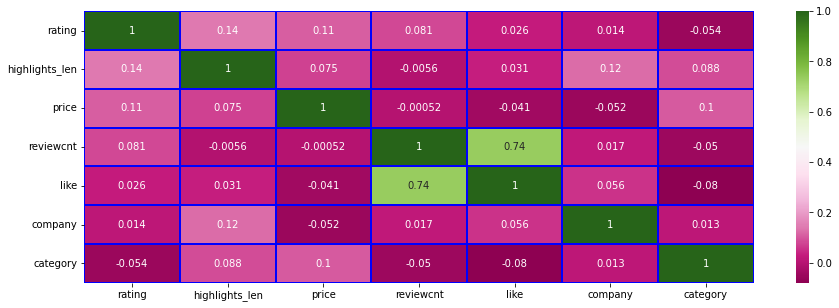

In [34]:
plt.figure(figsize=(15,5))

corr_train = zxcv.corr()


num = 10
col = corr_train.nlargest(num, 'rating')['rating'].index
coeff = np.corrcoef(zxcv[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='PiYG', linecolor='blue')

In [55]:
test.to_csv("data_not_yet.csv")

In [56]:
zxcv = test

In [57]:
zxcv

,company,rating,reviewcnt,price,like,category,highlights_len,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,word_0,word_1,word_2,word_3,word_4
name,,,,,,,,,,,,,,,,,,,,
Silicone Scalp Massager,127,96,330,12,54700,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scalp,massager,eco-friendly,silicone,hygienic
Leave-In Molecular Repair Hair Mask,77,86,2900,75,67200,1,4.0,Good for: Damage,All Hair Types,Without Silicones,Good for: Color Care,NaN,NaN,NaN,NaN,hair,damage,color,strength,ingredients
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,13,83,1300,25,94400,1,5.0,All Hair Types,Good for: Frizz,Good for: Dryness,Gluten Free,Increases Shine,NaN,NaN,NaN,hair,frizz,formulated,ingredients,leave-in
No. 3 Hair Repair Perfector,111,87,3900,30,519100,1,5.0,Good for: Damage,Community Favorite,Good for: Color Care,Good for: Volume,All Hair Types,NaN,NaN,NaN,hair,pre-shampoo,treatment,reduces,breakage
Moroccanoil Treatment Hair Oil,101,92,1800,34,190100,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multitasking,argan,oil-infused,hair,treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Acne Control Clarifying Body Spray,103,85,634,46,16700,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acne,spray,breakouts,body,skin
Watermelon Brightening Serum,96,75,296,36,36300,4,3.0,Good for: Dullness,Uneven Texture,Good for: Dryness,NaN,NaN,NaN,NaN,NaN,skin,solid,serum,visibly,tone
Alpha Beta® Pore Perfecting & Refining Serum,35,89,1500,65,26600,4,2.0,"Best for Oily, Combo, Normal Skin",Good for: Pores,NaN,NaN,NaN,NaN,NaN,NaN,pores,skin,pore,helps,acid


In [58]:
zxcv.drop(columns =["h_0", "h_1", "h_2", "h_3", "h_4", "h_5", "h_6", "h_7", "word_0", "word_1", "word_2", "word_3", "word_4"], inplace = True)

In [59]:
zxcv.to_csv("model_test_csv2.csv")

In [32]:
zxcv["rating"] = np.log1p(zxcv["rating"])

In [33]:
zxcv

,company,rating,reviewcnt,price,like,category,highlights_len
name,,,,,,,
Silicone Scalp Massager,122,4.574711,330,12,54700,1,0.0
Leave-In Molecular Repair Hair Mask,75,4.465908,2900,75,67200,1,4.0
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,13,4.430817,1300,25,94400,1,5.0
No. 3 Hair Repair Perfector,106,4.477337,3900,30,519100,1,5.0
Moroccanoil Treatment Hair Oil,97,4.532599,1800,34,190100,1,0.0
...,...,...,...,...,...,...,...
Stress Repair Face Cream with Niacinamide,35,4.477337,170,72,7000,2,0.0
Capture Totale High-Performance Treatment Serum-Lotion,32,4.418841,16,65,3100,2,4.0
Mini CC+ Cream Oil-Free Matte with SPF 40,66,4.219508,64,17,9200,2,5.0


In [35]:
zxcv.to_csv("asdfadsf.csv")

In [60]:
for i 

,company,rating,reviewcnt,price,like,category,highlights_len
name,,,,,,,
Silicone Scalp Massager,127,96,330,12,54700,1,0.0
Leave-In Molecular Repair Hair Mask,77,86,2900,75,67200,1,4.0
Farewell Frizz™ Rosarco Milk Leave-In Conditioner,13,83,1300,25,94400,1,5.0
No. 3 Hair Repair Perfector,111,87,3900,30,519100,1,5.0
Moroccanoil Treatment Hair Oil,101,92,1800,34,190100,1,0.0
...,...,...,...,...,...,...,...
Acne Control Clarifying Body Spray,103,85,634,46,16700,4,0.0
Watermelon Brightening Serum,96,75,296,36,36300,4,3.0
Alpha Beta® Pore Perfecting & Refining Serum,35,89,1500,65,26600,4,2.0


In [66]:
for i in zxcv.index:
    if zxcv.at[i, "rating"] <= 70:
        zxcv.drop(index = [i], inplace = True)


In [67]:
zxcv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, Silicone Scalp Massager to Noni Night AHA Pore & Resurfacing Serum
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         2417 non-null   int32  
 1   rating          2417 non-null   int64  
 2   reviewcnt       2417 non-null   int32  
 3   price           2417 non-null   int64  
 4   like            2417 non-null   int32  
 5   category        2417 non-null   int32  
 6   highlights_len  2417 non-null   float64
dtypes: float64(1), int32(4), int64(2)
memory usage: 177.8+ KB


In [72]:
zxcv.loc[:, "rating"] = zxcv.loc[:, "rating"].apply(lambda x : 1  if 70<= x <= 80 else 2 if 81 <= x <= 84 else 3 if 85 <= x <= 89 else 4 if 90 <= x <= 92 else 5 if 93 <= x <= 100 else 0)

In [74]:

zxcv.to_csv("last_test.csv")

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, Silicone Scalp Massager to Noni Night AHA Pore & Resurfacing Serum
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         2417 non-null   int32  
 1   rating          2417 non-null   int64  
 2   reviewcnt       2417 non-null   int32  
 3   price           2417 non-null   int64  
 4   like            2417 non-null   int32  
 5   category        2417 non-null   int32  
 6   highlights_len  2417 non-null   float64
dtypes: float64(1), int32(4), int64(2)
memory usage: 177.8+ KB
